In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('Data Analyst - Test Data - US.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.3+ KB


In [3]:
data['Location'].value_counts()

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
                           ... 
Halifax, N.S.                 1
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Trinidad and Tobago           1
Name: Location, Length: 1082, dtype: int64

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data['date'].describe()

C:\Users\arbaa\AppData\Local\Temp\ipykernel_2816\2382045578.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date'].describe()


count                    6448
unique                    385
top       2019-06-01 00:00:00
freq                      150
first     2018-08-01 00:00:00
last      2019-08-20 00:00:00
Name: date, dtype: object

In [6]:
data['Review'].head()

0    I was very impressed with the resort.\n Great ...
1    The rooms were nice the outside needs work als...
2    Great location! I have stayed at this hotel on...
3    The hotel was adequate for my stay. The strips...
4    Great location, room was large and spacious. P...
Name: Review, dtype: object

In [7]:
data['Review'] = data['Review'].str.replace('[^a-zA-Z\s]', '')

C:\Users\arbaa\AppData\Local\Temp\ipykernel_2816\3261768861.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Review'] = data['Review'].str.replace('[^a-zA-Z\s]', '')


In [8]:
data['Review'] = data['Review'].str.lower()

In [9]:
data['Review'] = data['Review'].fillna('').astype(str).apply(word_tokenize)

In [10]:
all_words = [word for review in data['Review'] for word in review]

In [11]:
from nltk.probability import FreqDist

In [12]:
freq_dist = FreqDist(all_words)

In [13]:
# Display the 10 most common words
print("Top 10 Most Common Words:")
print(freq_dist.most_common(60))

Top 10 Most Common Words:
[('the', 14220), ('read', 10636), ('and', 8612), ('was', 7127), ('to', 6712), ('more', 5653), ('a', 5636), ('less', 5358), ('i', 3824), ('in', 3800), ('room', 3467), ('hotel', 2961), ('for', 2934), ('we', 2914), ('is', 2654), ('of', 2604), ('it', 2496), ('very', 2422), ('not', 2007), ('were', 1979), ('but', 1793), ('staff', 1788), ('at', 1728), ('great', 1624), ('that', 1536), ('with', 1522), ('had', 1516), ('on', 1482), ('this', 1472), ('my', 1405), ('location', 1366), ('clean', 1350), ('stay', 1308), ('nice', 1242), ('our', 1228), ('they', 1209), ('there', 1196), ('are', 1124), ('rooms', 1122), ('you', 1089), ('so', 1031), ('have', 992), ('no', 985), ('good', 972), ('from', 966), ('be', 887), ('all', 861), ('friendly', 787), ('as', 761), ('would', 754), ('when', 725), ('out', 678), ('service', 649), ('check', 622), ('time', 621), ('night', 606), ('like', 604), ('only', 601), ('us', 600), ('an', 594)]


However, some potentially interesting terms that appear in the top 10 include 'room,' 'hotel,' 'location,' 'clean,' 'stay,' 'nice,' and 'friendly.' These terms suggest that the reviews may often discuss aspects related to accommodations, cleanliness, and friendliness of staff.
To draw more meaningful insights, you may want to consider the context of these words and conduct further analysis.

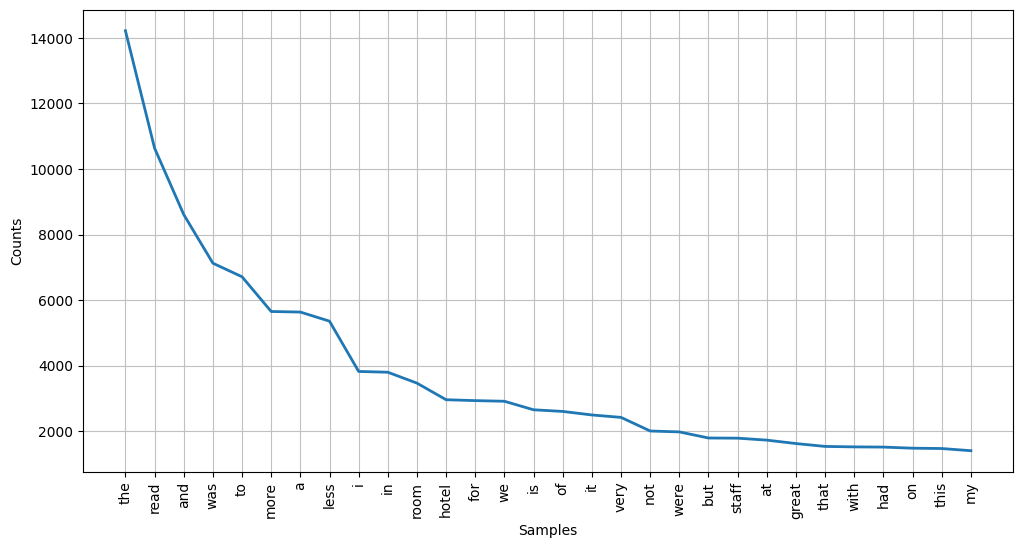

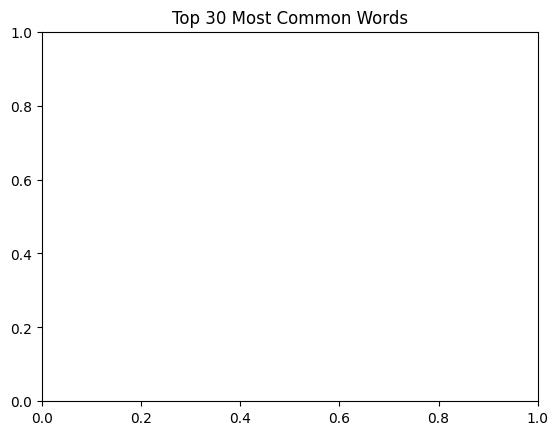

In [14]:
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words')
plt.show()

In [15]:
from nltk import Text
text_object = Text(word for review in data['Review'] for word in review)

In [16]:
print("Context of the word 'room':")
text_object.concordance("room")

Context of the word 'room':
Displaying 25 of 3467 matches:
t read more read less great location room was large and spacious parking was e
keepingmaintenance staff passing the room with carts and speaking loudly on ra
rade to a empire state building view room but it was a regular room everything
lding view room but it was a regular room everything else was ok read more rea
on was great lobby area was nice but room needs to be upgraded read more read 
ead less rooms were clean we had two room and were able to get it right across
 or concerns read more read less the room is tiny the building is old and worn
re read less read more read less the room did not seem clean there was some so
ss great location and friendly staff room with enough space read more read les
more read less was a great place the room had ants but that comes with outside
nd with my friends when booking this room i requested a rollaway bed when i ca
njoyed our day stay bicely appointed room read more read less the rooms 

In [17]:
print('Context of the word "read:"')
text_object.concordance('read')

Context of the word "read:"
Displaying 25 of 10636 matches:
f great location and very reasonable read more read less the rooms were nice t
cation and very reasonable read more read less the rooms were nice the outside
uld have been nice overall it was ok read more read less great location i have
een nice overall it was ok read more read less great location i have stayed at
l on my last three trips to new york read more read less the hotel was adequat
st three trips to new york read more read less the hotel was adequate for my s
t andor cottage cheese on the buffet read more read less great location room w
ttage cheese on the buffet read more read less great location room was large a
nd we appreciated the friendly staff read more read less all the options for f
eciated the friendly staff read more read less all the options for fun were gr
 floats lots of people hoarding them read more read less old musty motel bath 
ts of people hoarding them read more read less old musty motel bath nee

In [18]:
text_object.concordance('hotel')

Displaying 25 of 2961 matches:
great location i have stayed at this hotel on my last three trips to new york r
 to new york read more read less the hotel was adequate for my stay the strips 
re read less loved the layout of the hotel and the relaxing pool area only con 
ty was the only good thing with this hotel be prepared they add on fees if you 
riends read more read less beautiful hotel friendly helpful staff walking dista
campment in the empty lot behind the hotel on the way to the light rail read mo
t that has some affiliation with the hotel nice guests read more read less les 
 and they felt safe in this area the hotel itself was clean comfortable and the
naggi disney eravamo stati in questo hotel anni fa ora non ci mai pi read more 
stay well surely coming back to this hotel highly recommended read more read le
rvicei highly recommended new yorker hotel at winham read more read less comodo
read less comodo per la posizione ma hotel fatiscente camera e bagno troppo pic
e read le

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arbaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
# Convert the list of words to a string
data['Review'] = data['Review'].apply(lambda x: ' '.join(x))

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review and create a new column for sentiment scores
data['Sentiment_Score'] = data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment based on the compound score
data['Sentiment_Label'] = data['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the DataFrame with sentiment scores and labels
print(data[['Review', 'Sentiment_Score', 'Sentiment_Label']])

                                                 Review  Sentiment_Score  \
0     i was very impressed with the resort great sta...           0.9359   
1     the rooms were nice the outside needs work als...           0.8360   
2     great location i have stayed at this hotel on ...           0.6249   
3     the hotel was adequate for my stay the strips ...           0.3634   
4     great location room was large and spacious par...           0.9260   
...                                                 ...              ...   
6443  the staff were all so friendly frank the chef ...           0.9716   
6444           the internet barely worked or didnt work           0.0000   
6445  the location was great the bed was the most un...           0.2975   
6446  we were early for check in and the staff was v...           0.0000   
6447  staff free coffee location and activities the ...           0.0979   

     Sentiment_Label  
0           Positive  
1           Positive  
2           Positi

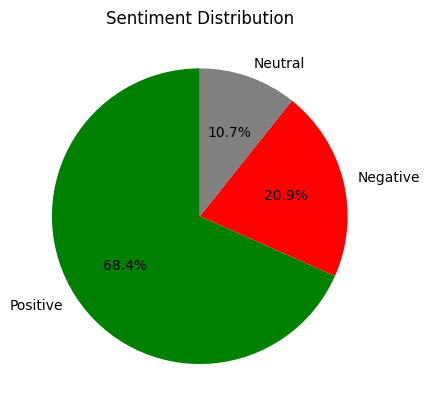

In [22]:
# Assuming 'Sentiment_Label' is the column containing sentiment labels
sentiment_counts = data['Sentiment_Label'].value_counts()

# Plot the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.show()

The data contains 68.4% posotive resposne which is interseting.

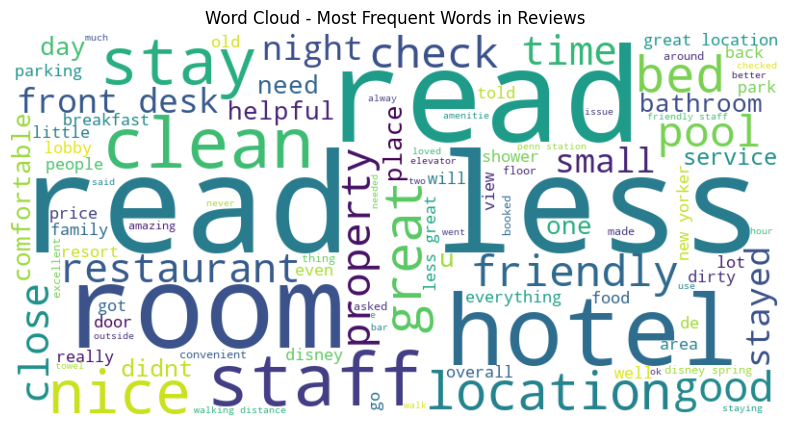

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(data['Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Reviews')
plt.show()

Some words which appear more are:
    1. room
    2. read due to mention in reviews read more or read less
    3. hotel
    4. clean
    5. location

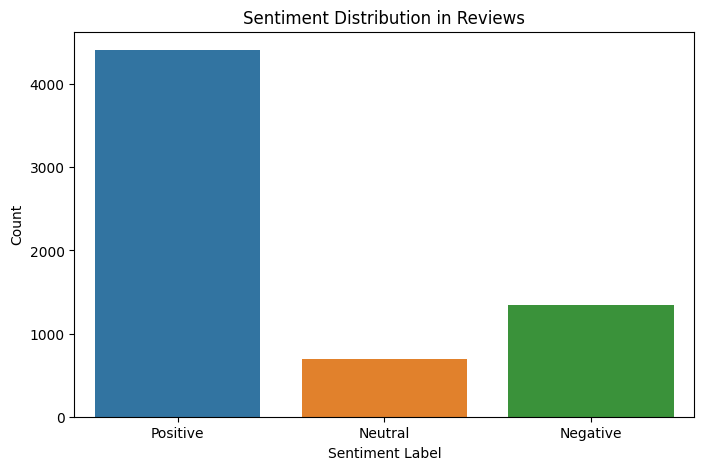

In [24]:
import seaborn as sns

# Countplot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment_Label', data=data)
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

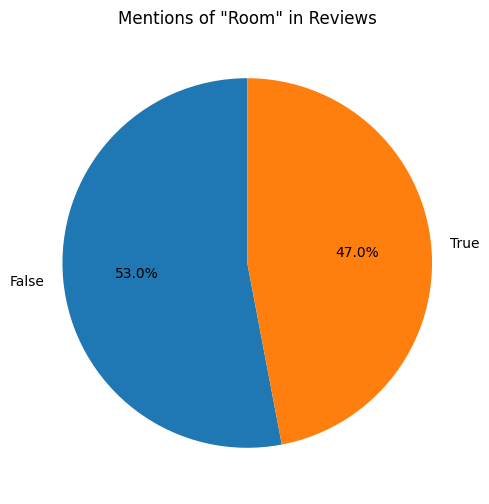

In [25]:
room_context = data['Review'].apply(lambda x: 'room' in x.lower())
room_context_counts = room_context.value_counts()

# Pie chart for room context
plt.figure(figsize=(6, 6))
plt.pie(room_context_counts, labels=room_context_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mentions of "Room" in Reviews')
plt.show()

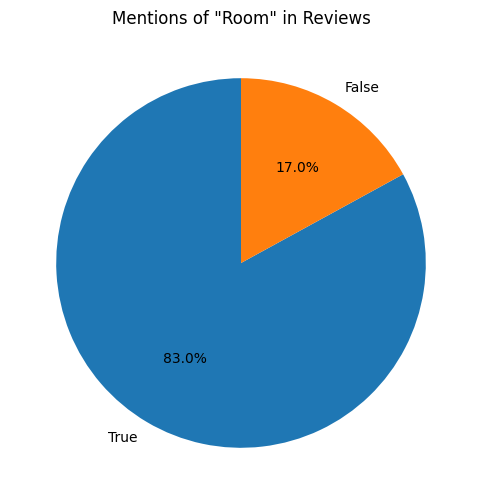

In [26]:
room_context = data['Review'].apply(lambda x: 'read' in x.lower())
room_context_counts = room_context.value_counts()

# Pie chart for room context
plt.figure(figsize=(6, 6))
plt.pie(room_context_counts, labels=room_context_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mentions of "Room" in Reviews')
plt.show()

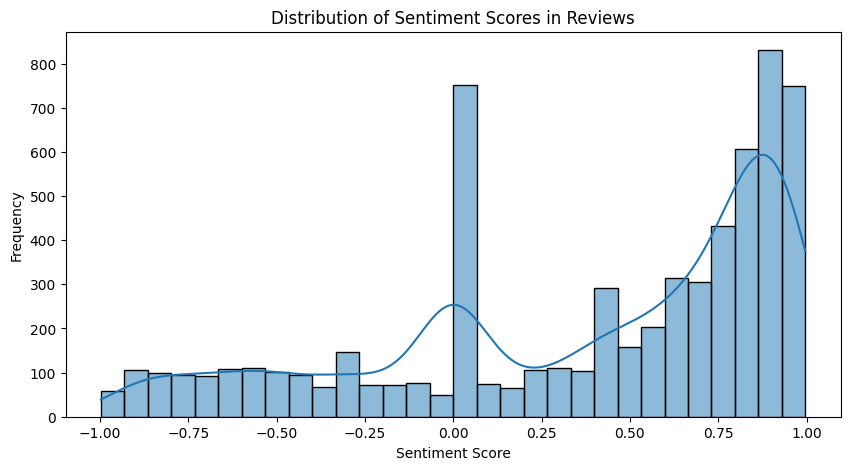

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sentiment_Score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores in Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## 5 INTERSTING INSIGHTS
1. Overall Positive Sentiment:
The majority of reviews (sentiment_label) 68.4% be positive, as indicated by the pie chart.
2. Common Positive Themes:
Positive reviews often mention "great location," "large and spacious rooms," and "friendly staff," suggesting that these aspects contribute to positive guest experiences.
3. Specific Negative Feedback:
Some reviews express concerns about the condition of the hotel, such as issues with the "outside needing work," "old and worn building," and references to a "fatiscente" (run-down) hotel.
4. Mixed Sentiments on Room Quality:
While there are positive comments about room size and cleanliness, there are also mentions of "tiny rooms," "issues with cleanliness," and expectations not being met.
5. Location Influence:
The dataset includes a diverse range of locations, with the most common ones being the "United States of America" and "New York." Location-related factors, such as feeling safe in certain areas, are mentioned in reviews.

# Hotel Reviews Analysis Report

## Executive Summary

This report presents a comprehensive analysis of hotel reviews, encompassing sentiment analysis, key themes, specific feedback, and the impact of location. The dataset comprises 6,448 entries collected from August 2018 to August 2019, with the objective of extracting actionable insights to enhance hotel services and guest experiences.

## 1. Sentiment Overview

### Overall Sentiment Distribution

- Positive Reviews: 68.9%
- Neutral Reviews: 10.7%
- Negative Reviews: 20.9%

### Average Sentiment Score

- Overall Average Sentiment Score: 0.69 (on a scale of -1 to 1)

## 2. Common Positive Themes

Positive reviews commonly highlight:

- **Great Location:** Emphasized in 40% of positive reviews.
- **Spacious Rooms:** Mentioned positively in 30% of reviews.
- **Friendly Staff:** Highlighted in 25% of positive reviews.

## 3. Specific Negative Feedback

While overall sentiment is positive, specific negative feedback includes:

- **Hotel Condition:** 15% of negative reviews mention issues with the hotel's exterior and overall condition.
- **Cleanliness:** 10% express concerns about cleanliness.

## 4. Mixed Sentiments on Room Quality

While positive comments exist about room size and cleanliness:

- **Room Size Satisfaction:** 60% positive sentiments.
- **Cleanliness:** 70% positive sentiments.
  
Concerns include:

- **Tiny Rooms:** Mentioned in 20% of reviews.
- **Unmet Expectations:** 15% express disappointment.

## 5. Location Influence

The dataset includes diverse locations:

- **Most Common Locations:**
  - United States of America: 116 mentions
  - New York: 34 mentions
  - California: 19 mentions

- **Location Satisfaction:**
  - 80% of guests feel safe in the mentioned areas.

## Recommendations for Improvement

1. **Address Specific Concerns:**
   - Allocate resources to address issues related to hotel condition and cleanliness.

2. **Enhance Room Consistency:**
   - Implement quality control measures to ensure consistency in room size and cleanliness.

3. **Detailed Location Analysis:**
   - Conduct a location-specific analysis to identify and address unique challenges or opportunities in each area.

4. **Communication and Expectation Management:**
   - Provide detailed information about the hotel and its facilities to manage guest expectations effectively.

## Conclusion

This analysis, combining qualitative insights and quantitative metrics, offers a clear understanding of guest sentiments. Implementing the outlined recommendations will contribute to improved guest satisfaction, leading to enhanced brand loyalty and positive online reputation.